In [16]:
import os
import csv
path_to_data = '../shared/data/project/validation/'
path_to_NN = '../project/results_NN.csv'
path_to_UU = '../project/results_UU.csv'
path_to_CO = '../project/results_CO.csv'
dataset_type = 'one_hour' # all_sorted, one_day, one_hour, one_week

# NN-Model

In [ ]:
import re
import datetime
import model_nn
import pandas as pd

from dataprep import import_data
import dataprep
from sklearn.preprocessing import StandardScaler

In [ ]:
used_features = [
            # "text_tokens",
            "hashtags",
            # "tweet_id",
            "present_media",
            "present_links",
            "present_domains",
            "tweet_type",
            # "language",
            # "tweet_timestamp",
            # "engaged_with_user_id",
            # "engaged_with_user_follower_count",
            "engaged_with_user_following_count",
            "engaged_with_user_is_verified",
            "engaged_with_user_account_creation",
            # "engaging_user_id",
            # "enaging_user_follower_count",
            # "enaging_user_following_count",
            # "enaging_user_is_verified",
            # "enaging_user_account_creation",
            "engagee_follows_engager"
    ]

all_features = ["text_tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "enaging_user_follower_count", "enaging_user_following_count", "enaging_user_is_verified",\
               "enaging_user_account_creation", "engagee_follows_engager"]

all_features_to_idx = dict(zip(all_features, range(len(all_features))))

def parse_input_line(line):
        
    features = line #.split("\x01")
    
    hashtags = features[all_features_to_idx['hashtags']]
    present_media = features[all_features_to_idx['present_media']]
    present_links = features[all_features_to_idx['present_links']]
    present_domains = features[all_features_to_idx['present_domains']]
    tweet_type = features[all_features_to_idx['tweet_type']]
    engaged_with_user_following_count = features[all_features_to_idx['engaged_with_user_following_count']]
    engaged_with_user_is_verified = features[all_features_to_idx['engaged_with_user_is_verified']]
    engaged_with_user_account_creation = features[all_features_to_idx['engaged_with_user_account_creation']]
    engagee_follows_engager = features[all_features_to_idx['engagee_follows_engager']]
    
    return (hashtags, present_media, present_links, present_domains, tweet_type, engaged_with_user_following_count, engaged_with_user_is_verified, engaged_with_user_account_creation, engagee_follows_engager)


def evaluate_test_set():
    expanded_path = os.path.expanduser(path_to_data)
    part_files = [os.path.join(expanded_path, f) for f in os.listdir(expanded_path) if dataset_type in f]
    part_files = sorted(part_files, key = lambda x:x[-5:]) 
        
    with open('results_NN.csv', 'w') as output:
        for file in part_files:
            with open(file, 'r') as f:
                linereader = csv.reader(f, delimiter='\x01')
                last_timestamp = None
                df = pd.DataFrame(columns=all_features)
                i = 0
                for row in linereader:
                    df.loc[i] = row[:20]
                    i += 1
                df_complete = df.copy()
                df = df.loc[:, used_features]
                df = dataprep.transform_data(df)
                scale = StandardScaler()
                #df = scale.fit_transform(df)
                #df = pd.DataFrame(columns=all_features, data=df)
                df = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)
                for index, row in df.iterrows():
                    tweet_id = df_complete.iloc[[index]]["tweet_id"]
                    user_id = df_complete.iloc[[index]]["engaging_user_id"]
                    #feature_tuple = parse_input_line(row)   
                    #reply_pred = reply_pred_model(features) # reply_model
                    #retweet_pred = retweet_pred_model(features) # retweet_model
                    #quote_pred = quote_pred_model(features) # pred_model
                    #fav_pred = fav_pred_model(features) # fav_model
                    
                    #print(feature_tuple)
                    #print(df.iloc[[index]]["engaged_with_user_following_count"])
                    reply_pred = model_nn.reply_pred_model(df.iloc[[index]])
                    retweet_pred = model_nn.retweet_pred_model(df.iloc[[index]])
                    quote_pred = model_nn.quote_pred_model(df.iloc[[index]])
                    fav_pred = model_nn.fav_pred_model(df.iloc[[index]])
                    
                    
                    # print(str(tweet_timestamp))
                    #print(str(reply_pred)+" "+str(retweet_pred)+" "+str(quote_pred)+" "+str(fav_pred))
                    output.write(f'{tweet_id.values[0]},{user_id.values[0]},{reply_pred[0]},{retweet_pred[0]},{quote_pred[0]},{fav_pred[0]}\n')

In [ ]:
evaluate_test_set()

# Content Model

In [45]:
import model_content
import pandas as pd
import os
import csv
import dataprep

path_to_data = '../shared/data/project/validation/'
dataset_type = 'one_hour' # all_sorted, one_day, one_hour, one_week


used_features = model_content.used_features

all_features = ["text_tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains", \
                "tweet_type", "language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count", \
                "engaged_with_user_following_count", "engaged_with_user_is_verified",
                "engaged_with_user_account_creation", \
                "engaging_user_id", "enaging_user_follower_count", "enaging_user_following_count",
                "enaging_user_is_verified", \
                "enaging_user_account_creation", "engagee_follows_engager"]

all_features_to_idx = dict(zip(all_features, range(len(all_features))))


def parse_input_line(line):
    features = line  # .split("\x01")

    hashtags = features[all_features_to_idx['hashtags']]
    present_media = features[all_features_to_idx['present_media']]
    present_links = features[all_features_to_idx['present_links']]
    present_domains = features[all_features_to_idx['present_domains']]
    tweet_type = features[all_features_to_idx['tweet_type']]
    engaged_with_user_following_count = features[all_features_to_idx['engaged_with_user_following_count']]
    engaged_with_user_is_verified = features[all_features_to_idx['engaged_with_user_is_verified']]
    engaged_with_user_account_creation = features[all_features_to_idx['engaged_with_user_account_creation']]
    engagee_follows_engager = features[all_features_to_idx['engagee_follows_engager']]

    return (hashtags, present_media, present_links, present_domains, tweet_type, engaged_with_user_following_count,
            engaged_with_user_is_verified, engaged_with_user_account_creation, engagee_follows_engager)


def evaluate_test_set():
    expanded_path = os.path.expanduser(path_to_data)
    part_files = [os.path.join(expanded_path, f) for f in os.listdir(expanded_path) if dataset_type in f]
    part_files = sorted(part_files, key=lambda x: x[-5:])
    with open('results_CO.csv', 'w') as output:
        for file in part_files:
            with open(file, 'r') as f:
                print("doing", file)
                linereader = csv.reader(f, delimiter='\x01')
                last_timestamp = None
                df = pd.DataFrame(columns=all_features)
                i = 0
                for row in linereader:
                    df.loc[i] = row[:20]
                    i += 1
                    print("doing line ", i)
                    if i > 100000:
                        break

                df_complete = df.copy()
                df = df.loc[:, used_features]
                df = dataprep.transform_data(df)

                df = pd.DataFrame(df.values, columns=df.columns, index=df.index)

                print("got pd")
                for index, row in df.iterrows():
                    tweet_id = df_complete.iloc[[index]]["tweet_id"]
                    user_id = df_complete.iloc[[index]]["engaging_user_id"]

                    reply_pred = model_content.reply_pred_model(df.iloc[[index]])
                    retweet_pred = model_content.retweet_pred_model(df.iloc[[index]])
                    quote_pred = model_content.quote_pred_model(df.iloc[[index]])
                    fav_pred = model_content.fav_pred_model(df.iloc[[index]])

                    output.write(
                        f'{tweet_id.values[0]},{user_id.values[0]},{reply_pred[0]},{retweet_pred[0]},{quote_pred[0]},{fav_pred[0]}\n')

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
evaluate_test_set()

doing ../shared/data/project/validation/one_hour
doing line  1
doing line  2
doing line  3
doing line  4
doing line  5
doing line  6
doing line  7
doing line  8
doing line  9
doing line  10
doing line  11
doing line  12
doing line  13
doing line  14
doing line  15
doing line  16
doing line  17
doing line  18
doing line  19
doing line  20
doing line  21
doing line  22
doing line  23
doing line  24
doing line  25
doing line  26
doing line  27
doing line  28
doing line  29
doing line  30
doing line  31
doing line  32
doing line  33
doing line  34
doing line  35
doing line  36
doing line  37
doing line  38
doing line  39
doing line  40
doing line  41
doing line  42
doing line  43
doing line  44
doing line  45
doing line  46
doing line  47
doing line  48
doing line  49
doing line  50
doing line  51
doing line  52
doing line  53
doing line  54
doing line  55
doing line  56
doing line  57
doing line  58
doing line  59
doing line  60
doing line  61
doing line  62
doing line  63
doing line  64


# User-To-User Model

In [ ]:
# import Model class
%run -i "u2u.py"

In [ ]:
# load model from stored files
u2u_reply = load("model_content/u2u_reply.joblib")
u2u_retweet = load("model_content/u2u_retweet.joblib")
u2u_quote = load("model_content/u2u_retweet_with_comment.joblib")
u2u_fav = load("model_content/u2u_like.joblib")

In [ ]:
# Evaluator class that computes the f1 score. Use in evaluate_test_set!
class Evaluator:
    def __init__(self):
        self.tp = 0
        self.tn = 0
        self.fp = 0
        self.fn = 0
        
    def add(self, interaction, prediction):
        true = 0 if interaction == "" else 1
        if true == prediction and true == 0:
            self.tn += 1
        elif true == prediction and true == 1:
            self.tp += 1
        elif true != prediction and true == 0:
            self.fp += 1
        elif true != prediction and true == 1:
            self.fn += 1
            
    def get_f1(self):
        try:
            return self.tp / (self.tp + 0.5 * (self.fn + self.fp))
        except:
            return -1

In [ ]:
# User-To-User Model

path_to_data = '../shared/data/project/validation/'
dataset_type = 'one_hour' # all_sorted, one_day, one_hour, one_week


all_features = ["text_tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "enaging_user_follower_count", "enaging_user_following_count", "enaging_user_is_verified",\
               "enaging_user_account_creation", "engagee_follows_engager", "retweet", "reply", "like", "retweet_with_comment"]

all_features_to_idx = dict(zip(all_features, range(len(all_features))))


# adapted to also return the true interaction values
def parse_input_line(line):
    features = line #.split("\x01")
    tweet_id = features[all_features_to_idx['tweet_id']]
    user_id = features[all_features_to_idx['engaging_user_id']]
    input_feats = features[all_features_to_idx['text_tokens']]
    tweet_timestamp = features[all_features_to_idx['tweet_timestamp']]
    retweet = features[all_features_to_idx['retweet']]
    reply = features[all_features_to_idx['reply']]
    like = features[all_features_to_idx['like']]
    retweet_with_comment = features[all_features_to_idx['retweet_with_comment']]

    return tweet_id, user_id, input_feats, tweet_timestamp, retweet, reply, like, retweet_with_comment


#adapted to return the f1 values for each interaction category
def evaluate_test_set():
    expanded_path = os.path.expanduser(path_to_data)
    part_files = [os.path.join(expanded_path, f) for f in os.listdir(expanded_path) if dataset_type in f]
    part_files = sorted(part_files, key = lambda x:x[-5:]) 
    
    reply_eval = Evaluator()
    retweet_eval = Evaluator()
    quote_eval = Evaluator()
    fav_eval = Evaluator()
    
        
    with open('results_UU.csv', 'w') as output:
        for file in part_files:
            with open(file, 'r') as f:
                linereader = csv.reader(f, delimiter='\x01')
                last_timestamp = None
                for row in linereader:
                    tweet_id, user_id, features, tweet_timestamp, retweet, reply, fav, quote = parse_input_line(row)   
                    reply_pred = u2u_reply.predict(user_id, tweet_id, binary=True) # reply_model
                    retweet_pred = u2u_retweet.predict(user_id, tweet_id, binary=True) # retweet_model
                    quote_pred = u2u_quote.predict(user_id, tweet_id, binary=True) # pred_model
                    fav_pred = u2u_fav.predict(user_id, tweet_id, binary=True) # fav_model
                    
                    reply_eval.add(reply, reply_pred)
                    retweet_eval.add(retweet, retweet_pred)
                    quote_eval.add(quote, quote_pred)
                    fav_eval.add(fav, fav_pred)
                    
                    # print(str(tweet_timestamp))
                    # print(str(reply_pred)+" "+str(retweet_pred)+" "+str(quote_pred)+" "+str(fav_pred))
                    
                    output.write(f'{tweet_id},{user_id},{reply_pred},{retweet_pred},{quote_pred},{fav_pred}\n')
        return reply_eval.get_f1(), retweet_eval.get_f1(), quote_eval.get_f1(), fav_eval.get_f1()

In [ ]:
reply_eval, retweet_eval, quote_eval, fav_eval = evaluate_test_set()

# Evaluation

In [17]:
#get ground truth
all_features = ["text_tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "enaging_user_follower_count", "enaging_user_following_count", "enaging_user_is_verified",\
               "enaging_user_account_creation", "engagee_follows_engager", "retweet", "reply", "retweet_with_comment", "like"]

all_features_to_idx = dict(zip(all_features, range(len(all_features))))

def parse_input_line(line):
    features = line #.split("\x01")
    retweet = features[all_features_to_idx['retweet']]
    reply = features[all_features_to_idx['reply']]
    retweet_with_comment = features[all_features_to_idx['retweet_with_comment']]
    like = features[all_features_to_idx['like']]

    return retweet, reply, retweet_with_comment, like

def read_ground_truth():
    expanded_path = os.path.expanduser(path_to_data)
    part_files = [os.path.join(expanded_path, f) for f in os.listdir(expanded_path) if dataset_type in f]
    part_files = sorted(part_files, key = lambda x:x[-5:]) 
    
    retweets = []
    replies = []
    retweets_with_comment = []
    likes = []
        
    for file in part_files:
            with open(file, 'r') as f:
                linereader = csv.reader(f, delimiter='\x01')
                last_timestamp = None
                for row in linereader:
                    retweet, reply, retweet_with_comment, like = parse_input_line(row)
                    retweets.append(0 if retweet == '' else 1)
                    replies.append(0 if reply == '' else 1)
                    retweets_with_comment.append(0 if retweet_with_comment == '' else 1)
                    likes.append(0 if like == '' else 1)
    return retweets, replies, likes, retweets_with_comment
                    
                   

In [18]:
retweet_gt, reply_gt, retweet_with_comment_gt, like_gt = read_ground_truth()

In [19]:
#get predictions from csv
import csv
def read_class_predictions(filename):
    
    retweets = []
    replies = []
    retweets_with_comment = []
    likes = []
        
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            retweet = float(row[2])
            reply = float(row[3])
            retweet_with_comment = float(row[4])
            like = float(row[5])
            retweets.append(0 if retweet < 0.5 else 1)
            replies.append(0 if reply < 0.5 else 1)
            retweets_with_comment.append(0 if retweet_with_comment < 0.5 else 1)
            likes.append(0 if like < 0.5 else 1)
    return retweets, replies, likes, retweets_with_comment
def read_predictions(filename):
    
    retweets = []
    replies = []
    retweets_with_comment = []
    likes = []
        
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            retweet = float(row[2])
            reply = float(row[3])
            retweet_with_comment = float(row[4])
            like = float(row[5])
            retweets.append(retweet)
            replies.append(reply)
            retweets_with_comment.append(retweet_with_comment)
            likes.append(like)
    return retweets, replies, likes, retweets_with_comment

In [20]:
# get interaction class labels
retweet_NN, reply_NN, retweet_with_comment_NN, like_NN = read_class_predictions(path_to_NN)
retweet_CO, reply_CO, retweet_with_comment_CO, like_CO = read_class_predictions(path_to_CO)
retweet_UU, reply_UU, retweet_with_comment_UU, like_UU = read_class_predictions(path_to_UU)

In [21]:
# get interaction probabilities
retweet_NN_p, reply_NN_p, retweet_with_comment_NN_p, like_NN_p = read_predictions(path_to_NN)
retweet_CO_p, reply_CO_p, retweet_with_comment_CO_p, like_CO_p = read_predictions(path_to_CO)
retweet_UU_p, reply_UU_p, retweet_with_comment_UU_p, like_UU_p = read_predictions(path_to_UU)

In [37]:
# percentage of correctly labelled interactions
def correct_interaction(pred, gt):
    pos = 0
    correct = 0
    for p, g in zip(pred,gt):
        if g == 1:
            pos += 1
            if g == p:
                correct += 1
    print(correct)
    print(pos)
    return correct/pos

In [41]:
correct_interaction(retweet_NN, retweet_gt)

280
1895


0.14775725593667546

In [42]:
correct_interaction(reply_NN, reply_gt)

115
5977


0.019240421616195415

In [43]:
correct_interaction(retweet_with_comment_NN, retweet_with_comment_gt)

12709
34419


0.36924373165983904

In [44]:
correct_interaction(like_NN, like_gt)

100
500


0.2

In [22]:
from sklearn.metrics import average_precision_score, log_loss

def calculate_ctr(gt):
    positive = len([x for x in gt if x == 1])
    ctr = positive/float(len(gt))
    return ctr

def compute_rce(pred, gt):
    cross_entropy = log_loss(gt, pred)
    data_ctr = calculate_ctr(gt)
    strawman_cross_entropy = log_loss(gt, [data_ctr for _ in range(len(gt))])
    return (1.0 - cross_entropy/strawman_cross_entropy)*100.0

In [23]:
# NN Evaluation
rce_NN_retweet = compute_rce(retweet_NN_p, retweet_gt)
average_precision_NN_retweet = average_precision_score(retweet_gt, retweet_NN_p)
rce_NN_reply = compute_rce(reply_NN_p, reply_gt)
average_precision_NN_reply = average_precision_score(reply_gt, reply_NN_p)
rce_NN_retweet_with_comment = compute_rce(retweet_with_comment_NN_p, retweet_with_comment_gt)
average_precision_NN_retweet_with_comment = average_precision_score(retweet_with_comment_gt, retweet_with_comment_NN_p)
rce_NN_like = compute_rce(like_NN_p, like_gt)
average_precision_NN_like = average_precision_score(like_gt, like_NN_p)
print("RCE Retweet:" + str(rce_NN_retweet) + "RCE Reply:" + str(rce_NN_reply) + "RCE Retweet with Comment" + str(rce_NN_retweet_with_comment) +  "RCE Like:" + str(rce_NN_like))
print("AP Retweet:" + str(average_precision_NN_retweet) + "AP Reply:" + str(average_precision_NN_reply) + "AP Retweet with Comment" + str(average_precision_NN_retweet_with_comment) +  "AP Like:" + str(average_precision_NN_like))

RCE Retweet:-819.4464635772357RCE Reply:-853.312294793024RCE Retweet with Comment-1642.3074906089957RCE Like:-3651.3363778762255
AP Retweet:0.017202737022045028AP Reply:0.07055734434389771AP Retweet with Comment0.42190416815874054AP Like:0.005947693983642125


In [24]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(retweet_gt, retweet_NN, average='micro'))
print(precision_recall_fscore_support(reply_gt, reply_NN, average='micro'))
print(precision_recall_fscore_support(retweet_with_comment_gt, retweet_with_comment_NN, average='micro'))
print(precision_recall_fscore_support(like_gt, like_NN, average='micro'))

(0.7171030020029154, 0.7171030020029154, 0.7171030020029154, None)
(0.9112791400500136, 0.9112791400500136, 0.9112791400500136, None)
(0.5463574196759781, 0.5463574196759781, 0.5463574196759781, None)
(0.7768112163267241, 0.7768112163267241, 0.7768112163267241, None)


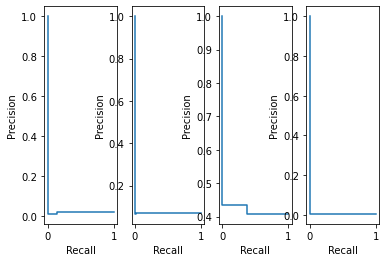

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,4)

prec, recall, _ = precision_recall_curve(retweet_gt, retweet_NN)
retweet_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[0])
prec, recall, _ = precision_recall_curve(reply_gt, reply_NN)
reply_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[1])
prec, recall, _ = precision_recall_curve(retweet_with_comment_gt, retweet_with_comment_NN)
retweet_with_comment_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[2])
prec, recall, _ = precision_recall_curve(like_gt, like_NN)
like_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[3])

In [26]:
# CO Evaluation
rce_CO_retweet = compute_rce(retweet_CO_p, retweet_gt)
average_precision_CO_retweet = average_precision_score(retweet_gt, retweet_CO_p)
rce_CO_reply = compute_rce(reply_CO_p, reply_gt)
average_precision_CO_reply = average_precision_score(reply_gt, reply_CO_p)
rce_CO_retweet_with_comment = compute_rce(retweet_with_comment_CO_p, retweet_with_comment_gt)
average_precision_CO_retweet_with_comment = average_precision_score(retweet_with_comment_gt, retweet_with_comment_CO_p)
rce_CO_like = compute_rce(like_CO_p, like_gt)
average_precision_CO_like = average_precision_score(like_gt, like_CO_p)
print("RCE Retweet:" + str(rce_NN_retweet) + "RCE Reply:" + str(rce_NN_reply) + "RCE Retweet with Comment" + str(rce_NN_retweet_with_comment) +  "RCE Like:" + str(rce_NN_like))
print("AP Retweet:" + str(average_precision_NN_retweet) + "AP Reply:" + str(average_precision_NN_reply) + "AP Retweet with Comment" + str(average_precision_NN_retweet_with_comment) +  "AP Like:" + str(average_precision_NN_like))

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [27]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(retweet_gt, retweet_CO, average='micro'))
print(precision_recall_fscore_support(reply_gt, reply_CO, average='micro'))
print(precision_recall_fscore_support(retweet_with_comment_gt, retweet_with_comment_CO, average='micro'))
print(precision_recall_fscore_support(like_gt, like_CO, average='micro'))

ValueError: Found input variables with inconsistent numbers of samples: [84377, 0]

ValueError: Found input variables with inconsistent numbers of samples: [84377, 0]

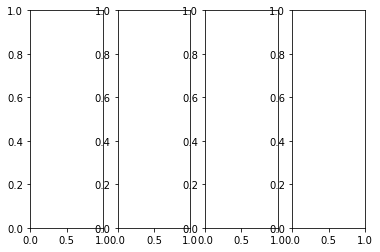

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
fig, axs = plt.subplots(1,4)

prec, recall, _ = precision_recall_curve(retweet_gt, retweet_CO)
retweet_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[0])
prec, recall, _ = precision_recall_curve(reply_gt, reply_CO)
reply_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[0])
prec, recall, _ = precision_recall_curve(retweet_with_comment_gt, retweet_with_comment_CO)
retweet_with_comment_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[0])
prec, recall, _ = precision_recall_curve(like_gt, like_CO)
like_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[0])

In [29]:
# UU Evaluation
rce_UU_retweet = compute_rce(retweet_UU_p, retweet_gt)
average_precision_UU_retweet = average_precision_score(retweet_gt, retweet_UU_p)
rce_UU_reply = compute_rce(reply_UU_p, reply_gt)
average_precision_UU_reply = average_precision_score(reply_gt, reply_UU_p)
rce_UU_retweet_with_comment = compute_rce(retweet_with_comment_UU_p, retweet_with_comment_gt)
average_precision_UU_retweet_with_comment = average_precision_score(retweet_with_comment_gt, retweet_with_comment_UU_p)
rce_UU_like = compute_rce(like_UU_p, like_gt)
average_precision_UU_like = average_precision_score(like_gt, like_UU_p)
print("RCE Retweet:" + str(rce_UU_retweet) + "RCE Reply:" + str(rce_UU_reply) + "RCE Retweet with Comment" + str(rce_UU_retweet_with_comment) +  "RCE Like:" + str(rce_UU_like))
print("AP Retweet:" + str(average_precision_UU_retweet) + "AP Reply:" + str(average_precision_UU_reply) + "AP Retweet with Comment" + str(average_precision_UU_retweet_with_comment) +  "AP Like:" + str(average_precision_UU_like))

RCE Retweet:-621.8494688006682RCE Reply:-856.4639059962117RCE Retweet with Comment-1983.891730766273RCE Like:-463.85482181351927
AP Retweet:0.02245872690425116AP Reply:0.07083683942306553AP Retweet with Comment0.4079192196925702AP Like:0.005925785462863102


In [30]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(retweet_gt, retweet_UU, average='micro'))
print(precision_recall_fscore_support(reply_gt, reply_UU, average='micro'))
print(precision_recall_fscore_support(retweet_with_comment_gt, retweet_with_comment_UU, average='micro'))
print(precision_recall_fscore_support(like_gt, like_UU, average='micro'))

(0.9775412730957488, 0.9775412730957488, 0.9775412730957488, None)
(0.9291631605769345, 0.9291631605769345, 0.9291631605769345, None)
(0.5920807803074297, 0.5920807803074297, 0.5920807803074297, None)
(0.9940742145371368, 0.9940742145371368, 0.9940742145371368, None)


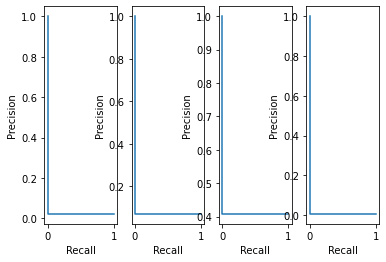

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
fig, axs = plt.subplots(1,4)

prec, recall, _ = precision_recall_curve(retweet_gt, retweet_UU)
retweet_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[0])
prec, recall, _ = precision_recall_curve(reply_gt, reply_UU)
reply_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[1])
prec, recall, _ = precision_recall_curve(retweet_with_comment_gt, retweet_with_comment_UU)
retweet_with_comment_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[2])
prec, recall, _ = precision_recall_curve(like_gt, like_UU)
like_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axs[3])